# **Automatidata project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

The data consulting firm Automatidata has recently hired you as the newest member of their data analytics team. Their newest client, the NYC Taxi and Limousine Commission (New York City TLC), wants the Automatidata team to build a multiple linear regression model to predict taxi fares using existing data that was collected over the course of a year. The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and A/B testing.

The Automatidata team has reviewed the results of the A/B testing. Now it’s time to work on predicting the taxi fare amounts. You’ve impressed your Automatidata colleagues with your hard work and attention to detail. The data team believes that you are ready to build the regression model and update the client New York City TLC about your progress.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# Course 5 End-of-course project: Build a multiple linear regression model

In this activity, you will build a multiple linear regression model. As you've learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed. 

Completing this activity will help you practice planning out and buidling a multiple linear regression model based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.
<br/>

**The purpose** of this project is to demostrate knowledge of EDA and a multiple linear regression model

**The goal** is to build a multiple linear regression model and evaluate the model
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a multiple linear regression model?

**Part 2:** Model Building and evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

# Build a multiple linear regression model

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: **Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.


### Task 1. Imports and loading
Import the packages that you've learned are needed for building linear regression models.

In [1]:
# Imports
# Packages for numerics + dataframes
import numpy as np

# Packages for visualization
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Packages for date conversions for calculating trip durations
import datetime as dt

# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

**Note:** `Pandas` is used to load the NYC TLC dataset. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe 
df0=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: **Analyze**

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a multiple linear regression model?


==> ENTER YOUR RESPONSE HERE 

### Task 2a. Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

Start with `.shape` and `.info()`.

In [3]:
# Start with `.shape` and `.info()`
df0.info()
df0.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

(22699, 18)

Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [4]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()

# Check for Duplicates
print("Dataframe Shape:", df0.shape)
print("Shape of Dataframe with Duplicates Dropped:", df0.drop_duplicates().shape)

# Check for Missing Values
print("Total Count of Missing Values:", df0.isna().sum().sum())

# Display Missing Values per Column
df0.isna().sum()

Dataframe Shape: (22699, 18)
Shape of Dataframe with Duplicates Dropped: (22699, 18)
Total Count of Missing Values: 0


Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

Use `.describe()`.

In [5]:
# Use .describe()
df0.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


### Task 2b. Convert pickup & dropoff columns to datetime


In [6]:
# Check the format of the data
df0.dtypes

Unnamed: 0                 int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [7]:
# Convert datetime columns to datetime
df0['tpep_pickup_datetime'] = pd.to_datetime(df0['tpep_pickup_datetime'])
df0['tpep_dropoff_datetime'] = pd.to_datetime(df0['tpep_dropoff_datetime'])

In [8]:
df0.dtypes

Unnamed: 0                        int64
VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object

### Task 2c. Create duration column

Create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [9]:
# Create `duration` column
df0['duration'] = (df0['tpep_dropoff_datetime'] - df0['tpep_pickup_datetime']) / pd.Timedelta(minutes=1)
df0['duration'] = df0['duration'].round()

### Outliers

Call `df.info()` to inspect the columns and decide which ones to check for outliers.

In [10]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

Keeping in mind that many of the features will not be used to fit your model, the most important columns to check for outliers are likely to be:
* `trip_distance`
* `fare_amount`
* `duration`



### Task 2d. Box plots

Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

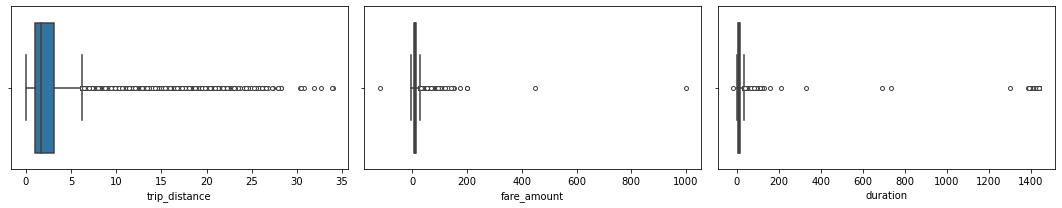

In [12]:
# Create a figure with 3 subplots in a row
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))

# Customize outlier properties
flier_kws = dict(marker='o', markerfacecolor='white', markersize=4, linestyle='none')

# Plot each boxplot with the modified outlier size 
sns.boxplot(x="trip_distance", data=df0, ax=axes[0], flierprops=flier_kws)
sns.boxplot(x="fare_amount", data=df0, ax=axes[1], flierprops=flier_kws)
sns.boxplot(x="duration", data=df0, ax=axes[2], flierprops=flier_kws)

# Adjust spacing and labels (optional)
fig.tight_layout()

plt.show()

**Questions:** 
1. Which variable(s) contains outliers? 

2. Are the values in the `trip_distance` column unbelievable?

3. What about the lower end? Do distances, fares, and durations of 0 (or negative values) make sense?

1. Outliers are present in all three variables.

2. While most cab trips are short (around 2 miles), there are outliers extending up to 6 miles. Trips exceeding 20 miles are significantly less common.

3. Fare amounts of 0 likely indicate data errors and should be addressed or excluded from the analysis.

### Task 2e. Imputations

#### `trip_distance` outliers

You know from the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?

To check, sort the column values, eliminate duplicates, and inspect the least 10 values. Are they rounded values or precise values?

In [13]:
# Are trip distances of 0 bad data or very short trips rounded down?
sorted(set(df0['trip_distance']))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Calculate the count of rides where the `trip_distance` is zero.

In [15]:
count_zero_distance_trips = (df0["trip_distance"] == 0.0).sum()

In [16]:
count_zero_distance_trips

148

#### `fare_amount` outliers

In [17]:
df0["fare_amount"].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

**Question:** What do you notice about the values in the `fare_amount` column?

* The 'fare_amount' column contains negative values, indicating likely data errors. Zero fares are plausible (representing cancelled trips). However, extremely high fares (reaching 1000) seem unrealistic. We can address these outliers by capping them with a calculated threshold, such as using the Q3 + (X * IQR) formula.

Impute values less than $0 with `0`.

In [18]:
# Impute values less than $0 with 0
df0['fare_amount'] = df0['fare_amount'].where(df0['fare_amount'] >= 0, 0)

Now impute the maximum value as `Q3 + (6 * IQR)`.

In [19]:
'''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''

def impute_with_outlier_limit(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outlier_limit = Q3 + (6 * IQR)  
        df[col] = np.where(df[col] > outlier_limit, outlier_limit, df[col])

    return df

# Specify the columns to process
columns_to_impute = ['trip_distance','fare_amount', 'total_amount','tip_amount']

# Impute values using the function
df0 = impute_with_outlier_limit(df0, columns_to_impute)

In [20]:
df0.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.823424,1.043394,162.412353,161.527997,1.336887,12.897913,0.333275,0.497445,1.818543,0.312542,0.299551,16.116802,17.012952
std,3.274493e+07,0.496838,1.285231,3.252029,0.708391,66.633373,70.139691,0.496211,10.541137,0.463097,0.039465,2.374812,1.399212,0.015673,12.940043,61.998403
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,-17.000000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,7.000000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,11.000000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,18.000000
max,1.134863e+08,2.000000,6.000000,15.480000,99.000000,265.000000,265.000000,4.000000,62.500000,4.500000,0.500000,17.150000,19.100000,0.300000,72.100000,1440.000000


#### `duration` outliers


In [21]:
# Call .describe() for duration outliers
df0['duration'].describe()

count    22699.000000
mean        17.012952
std         61.998403
min        -17.000000
25%          7.000000
50%         11.000000
75%         18.000000
max       1440.000000
Name: duration, dtype: float64

The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [22]:
# Impute a 0 for any negative values
df0['duration'] = df0['duration'].where(df0['duration'] >= 0, 0)

In [23]:
df0['duration'].describe()

count    22699.000000
mean        17.013701
std         61.998094
min          0.000000
25%          7.000000
50%         11.000000
75%         18.000000
max       1440.000000
Name: duration, dtype: float64

In [24]:
# Impute the high outliers

def impute_with_outlier_limit(df, col):
    """ Imputes missing values or extreme outliers with an outlier limit """

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    outlier_limit = Q3 + (6 * IQR)  # Adjust '6' for a more or less strict limit
    df[col] = np.where(df[col] > outlier_limit, outlier_limit, df[col])

    return df

# Impute values using the function
df0 = impute_with_outlier_limit(df0, 'duration')

In [25]:
df0['duration'].describe()

count    22699.000000
mean        14.443368
std         11.854509
min          0.000000
25%          7.000000
50%         11.000000
75%         18.000000
max         84.000000
Name: duration, dtype: float64

### Task 3a. Feature engineering

#### Create `mean_distance` column

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you *do* know to generalize about ones you do not know.

In this step, create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

For example, if your data were:

|Trip|Start|End|Distance|
|--: |:---:|:-:|    |
| 1  | A   | B | 1  |
| 2  | C   | D | 2  |
| 3  | A   | B |1.5 |
| 4  | D   | C | 3  |

The results should be:
```
A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles
```

Notice that C -> D is not the same as D -> C. All trips that share a unique pair of start and end points get grouped and averaged.

Then, a new column `mean_distance` will be added where the value at each row is the average for all trips with those pickup and dropoff locations:

|Trip|Start|End|Distance|mean_distance|
|--: |:---:|:-:|  :--   |:--   |
| 1  | A   | B | 1      | 1.25 |
| 2  | C   | D | 2      | 2    |
| 3  | A   | B |1.5     | 1.25 |
| 4  | D   | C | 3      | 3    |


Begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row.

One way to do this is to convert the pickup and dropoff location IDs to strings and join them, separated by a space. The space is to ensure that, for example, a trip with pickup/dropoff points of 12 & 151 gets encoded differently than a trip with points 121 & 51.

So, the new column would look like this:

|Trip|Start|End|pickup_dropoff|
|--: |:---:|:-:|  :--         |
| 1  | A   | B | 'A B'        |
| 2  | C   | D | 'C D'        |
| 3  | A   | B | 'A B'        |
| 4  | D   | C | 'D C'        |


In [26]:
# Create `pickup_dropoff` column
df0['pickup_dropoff'] = df0['PULocationID'].astype(str) + ' ' + df0['DOLocationID'].astype(str)

In [27]:
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.0,100 231
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.0,186 43
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.0,262 236
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.0,188 97
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,17.0,4 112


Now, use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. Assign the results to a variable named `grouped`.

In [28]:
grouped = df0.groupby('pickup_dropoff').mean(numeric_only=True)[['trip_distance']]

In [29]:
grouped[:5]

,trip_distance
pickup_dropoff,
1 1,2.433333
10 148,15.480000
100 1,15.480000
100 100,0.253333
100 107,1.180000


`grouped` is an object of the `DataFrame` class.

1. Convert it to a dictionary using the [`to_dict()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html) method. Assign the results to a variable called `grouped_dict`. This will result in a dictionary with a key of `trip_distance` whose values are another dictionary. The inner dictionary's keys are pickup/dropoff points and its values are mean distances. This is the information you want.

```
Example:
grouped_dict = {'trip_distance': {'A B': 1.25, 'C D': 2, 'D C': 3}
```

2. Reassign the `grouped_dict` dictionary so it contains only the inner dictionary. In other words, get rid of `trip_distance` as a key, so:

```
Example:
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
 ```

In [30]:
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()

# 2. Reassign to only contain the inner dictionary
grouped_dict = grouped_dict['trip_distance']

1. Create a `mean_distance` column that is a copy of the `pickup_dropoff` helper column.

2. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `mean_distance` series. Pass `grouped_dict` as its argument. Reassign the result back to the `mean_distance` series.
</br></br>
When you pass a dictionary to the `Series.map()` method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary.

```
Example:
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 'A B'        |
| 'C D'        |
| 'A B'        |
| 'D C'        |
| 'E F'        |

```
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
df['mean_distance`] = df['mean_distance'].map(grouped_dict)
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 1.25         |
| 2            |
| 1.25         |
| 3            |
| NaN          |

When used this way, the `map()` `Series` method is very similar to `replace()`, however, note that `map()` will impute `NaN` for any values in the series that do not have a corresponding key in the mapping dictionary, so be careful.

In [31]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df0['mean_distance'] = df0['pickup_dropoff']

# 2. Map `grouped_dict` to the `mean_distance` column
df0['mean_distance'] = df0['mean_distance'].map(grouped_dict)

In [32]:
# Confirm that it worked
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.0,100 231,3.521667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.0,186 43,3.108889
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.0,262 236,0.881429
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.0,188 97,3.700000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.0,0.3,17.80,17.0,4 112,4.435000


#### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [34]:
grouped = df0.groupby('pickup_dropoff').mean(numeric_only=True)[['duration']]

# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos

grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['duration']

df0['mean_duration'] = df0['pickup_dropoff']
df0['mean_duration'] = df0['mean_duration'].map(grouped_dict)

In [35]:
# Confirm that it worked
df0.head()
grouped[:5]

,duration
pickup_dropoff,
1 1,0.333333
10 148,69.000000
100 1,48.000000
100 100,3.166667
100 107,11.333333


#### Create `day` and `month` columns

Create two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [37]:
# Create 'day' col
df0['day'] = df0['tpep_pickup_datetime'].dt.day

# Create 'month' col
df0['month'] = df0['tpep_pickup_datetime'].dt.month

In [38]:
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,2.76,0.0,0.3,16.56,14.0,100 231,3.521667,23.000000,25,3
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,4.00,0.0,0.3,20.80,26.0,186 43,3.108889,24.444444,11,4
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,1.45,0.0,0.3,8.75,7.0,262 236,0.881429,7.257143,15,12
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,6.39,0.0,0.3,27.69,30.0,188 97,3.700000,30.000000,7,5
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.00,0.0,0.3,17.80,17.0,4 112,4.435000,15.000000,15,4


#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [39]:
# Create 'rush_hour' col
df0['rush_hour'] = df0['tpep_pickup_datetime'].dt.hour

In [40]:
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,14.0,100 231,3.521667,23.000000,25,3,8
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,20.80,26.0,186 43,3.108889,24.444444,11,4,14
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,7.0,262 236,0.881429,7.257143,15,12,7
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.3,27.69,30.0,188 97,3.700000,30.000000,7,5,13
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.80,17.0,4 112,4.435000,15.000000,15,4,23


In [41]:
def rush_hourizer(hour):
    if 6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else:
        val = 0
    return val

In [42]:
# Apply the `rush_hourizer()` function to the new column
df0.loc[(df0.day != 'saturday') & (df0.day != 'sunday'), 'rush_hour'] = df0.apply(rush_hourizer, axis=1)

In [43]:
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,14.0,100 231,3.521667,23.000000,25,3,1
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,20.80,26.0,186 43,3.108889,24.444444,11,4,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,7.0,262 236,0.881429,7.257143,15,12,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.3,27.69,30.0,188 97,3.700000,30.000000,7,5,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.80,17.0,4 112,4.435000,15.000000,15,4,0


### Task 4. Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

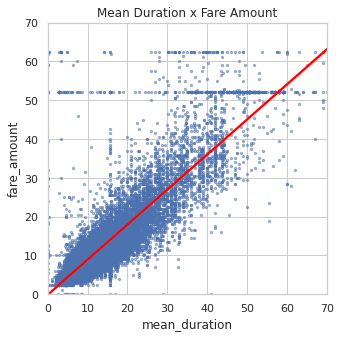

In [44]:
# Create a scatterplot to visualize the relationship between variables of interest
sns.set(style="whitegrid")
p=plt.figure()
p.set_figwidth(5)
p.set_figheight(5)
sns.regplot(x=df0['mean_duration'], y=df0['fare_amount'],
           scatter_kws={'alpha':0.5, 's':5},
           line_kws={'color':'red'})

plt.ylim(0,70)
plt.xlim(0,70)
plt.title("Mean Duration x Fare Amount")
plt.show()

The `mean_duration` variable correlates with the target variable. But what are the horizontal lines around fare amounts of 52 dollars and 63 dollars? What are the values and how many are there?

You know what one of the lines represents. 62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of \$62.50. What is the other line?

Check the value of the rides in the second horizontal line in the scatter plot.

In [45]:
ride_values = df0[(df0['fare_amount'] >= 51) & (df0['fare_amount'] <= 53)]

Examine the first 30 of these trips.

In [46]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)
ride_values.head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,15.48,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.10,37.0,236 132,15.480000,39.666667,5,3,1
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,15.48,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,67.0,132 163,15.480000,53.100000,3,6,0
156,104881101,1,2017-12-11 10:21:18,2017-12-11 11:14:57,1,15.48,1,N,138,88,1,51.5,0.0,0.5,11.60,5.76,0.3,69.66,54.0,138 88,15.353333,63.000000,11,12,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,1.0,132 132,1.941034,2.931034,11,11,0
242,67332929,2,2017-08-09 08:32:09,2017-08-09 09:31:11,1,15.48,1,N,138,87,1,53.0,0.0,0.5,10.00,5.76,0.3,69.56,59.0,138 87,13.710833,44.333333,9,8,1
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,15.48,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,29.0,132 79,15.480000,47.333333,6,12,0
356,108458749,2,2017-12-21 21:31:12,2017-12-21 22:11:58,6,15.48,1,N,132,145,1,51.5,0.5,0.5,0.00,0.00,0.3,52.80,41.0,132 145,15.267143,40.857143,21,12,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,15.48,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,72.10,29.0,132 234,15.480000,50.000000,24,9,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,15.48,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,40.0,132 48,15.480000,58.095238,28,2,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,16.0,228 88,4.730000,16.000000,5,6,0


**Question:** What do you notice about the first 30 trips?

A concentration of trips priced at $52 with a PULocationID of 132 suggests a potential flat-fare structure. These trips share a RateCodeID of 2, which corresponds to John F. Kennedy International Airport (JFK).  Research confirms that a flat fare between JFK and Manhattan was established in 2017.

### Task 5. Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [47]:
df02 = df0.copy()

keep_columns = ['VendorID','passenger_count','fare_amount','mean_distance','mean_duration','rush_hour']

In [48]:
df02 = df02.loc[:, keep_columns]

In [49]:
df02.head()

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
0,2,6,13.0,3.521667,23.000000,1
1,1,1,16.0,3.108889,24.444444,0
2,1,1,6.5,0.881429,7.257143,1
3,2,1,20.5,3.700000,30.000000,0
4,2,1,16.5,4.435000,15.000000,0


### Task 6. Pair plot

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

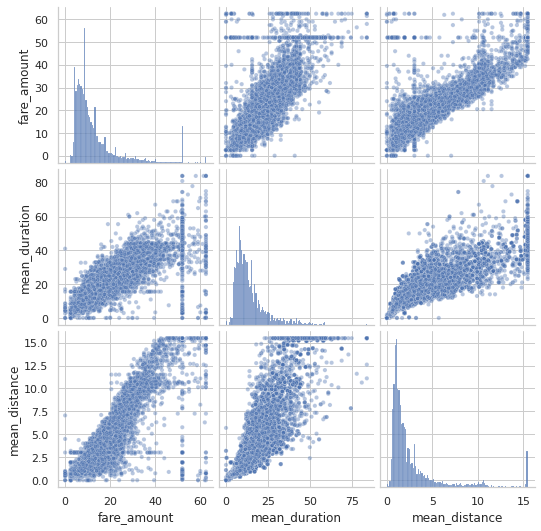

In [50]:
# Create a pairplot to visualize pairwise relationships between variables in the data
sns.pairplot(df02[["fare_amount","mean_duration","mean_distance"]], plot_kws={"alpha":0.4,"size":5})

These variables all show linear correlation with each other. Investigate this further.

### Task 7. Identify correlations

Next, code a correlation matrix to help determine most correlated variables.

In [51]:
# Correlation matrix to help determine most correlated variables
corr_matrix = df02.corr()

Visualize a correlation heatmap of the data.

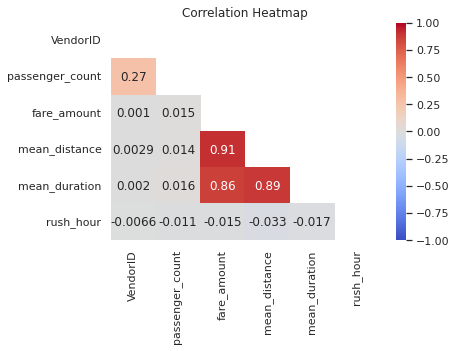

In [52]:
# Create correlation heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

**Question:** Which variable(s) are correlated with the target variable of `fare_amount`? 

Try modeling with both variables even though they are correlated.

The variables 'mean_distance' and 'mean_duration' exhibit strong correlations with the target variable, 'fare_amount'. Nevertheless, their high correlation with each other introduces potential multicollinearity issues for linear regression models.

While multicollinearity can complicate the interpretation of individual feature coefficients, it doesn't necessarily hinder predictive performance. If your primary goal is accurate prediction, you may still successfully utilize these correlated variables.

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.


### Task 8a. Split data into outcome variable and features

In [53]:
df02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


Set your X and y variables. X represents the features and y represents the outcome (target) variable.

In [54]:
# Remove the target column from the features
X = df02.drop(columns='fare_amount')

# Set y variable
y = df02[['fare_amount']]

# Display first few rows
print(X.head())
print(y.head())

   VendorID  passenger_count  mean_distance  mean_duration  rush_hour
0         2                6       3.521667      23.000000          1
1         1                1       3.108889      24.444444          0
2         1                1       0.881429       7.257143          1
3         2                1       3.700000      30.000000          0
4         2                1       4.435000      15.000000          0
   fare_amount
0         13.0
1         16.0
2          6.5
3         20.5
4         16.5


### Task 8b. Pre-process data


Dummy encode categorical variables

In [55]:
# Convert VendorID to string

# Create dummy variables
dummies = pd.get_dummies(df02['VendorID'])

# Get dummies
df02 = pd.concat([df02, dummies], axis=1)

In [135]:
df02

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour,1,2
0,2,6,13.0,3.521667,23.000000,1,0,1
1,1,1,16.0,3.108889,24.444444,0,1,0
2,1,1,6.5,0.881429,7.257143,1,1,0
3,2,1,20.5,3.700000,30.000000,0,0,1
4,2,1,16.5,4.435000,15.000000,0,0,1
...,...,...,...,...,...,...,...,...
22694,2,3,4.0,1.098214,8.607143,1,0,1
22695,2,1,52.0,15.480000,59.250000,1,0,1
22696,2,1,4.5,0.684242,6.606061,0,0,1
22697,2,1,10.5,2.077500,16.750000,0,0,1


### Split data into training and test sets

Create training and testing sets. The test set should contain 20% of the total samples. Set `random_state=0`.

In [56]:
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

### Standardize the data

Use `StandardScaler()`, `fit()`, and `transform()` to standardize the `X_train` variables. Assign the results to a variable called `X_train_scaled`.

In [57]:
# Standardize the X variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [58]:
print("X_train_scaled:", X_train_scaled)

X_train_scaled: [[ 0.89575785 -0.49880314 -0.01260334  0.00247249 -0.79866399]
 [ 0.89575785 -0.49880314  0.54126973 -0.05492101  1.25209101]
 [ 0.89575785  0.28284738 -0.45175539  0.01452995 -0.79866399]
 ...
 [ 0.89575785  0.28284738 -0.54843653 -0.50996946  1.25209101]
 [ 0.89575785  0.28284738 -0.23043207  0.38404465 -0.79866399]
 [ 0.89575785 -0.49880314  2.07339186  0.73218983 -0.79866399]]


### Fit the model

Instantiate your model and fit it to the training data.

In [59]:
# Fit your model to the training data
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Task 8c. Evaluate model

### Train data

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [99]:
# Evaluate the model performance on the training data
rss = lr.score(X_train_scaled, y_train)

y_pred_train = lr.predict(X_train_scaled)

r2 = r2_score(y_train, y_pred_train) 
mae = mean_absolute_error(y_train, y_pred_train)
mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)

print('Residual Sum of Squares (RSS):', rss)
print('R-squared (R2):', r2)
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)

Residual Sum of Squares (RSS): 0.8497662002020118
R-squared (R2): 0.8497662002020118
Mean Absolute Error (MAE): 2.1843758160626408
Mean Squared Error (MSE): 16.979311620473283
Root Mean Squared Error (RMSE): 4.120596027333095


### Test data

Calculate the same metrics on the test data. Remember to scale the `X_test` data using the scaler that was fit to the training data. Do not refit the scaler to the testing data, just transform it. Call the results `X_test_scaled`.

In [61]:
# Scale the X_test data
X_test_scaled = scaler.transform(X_test)

In [62]:
# Evaluate the model performance on the testing data

rss_test = lr.score(X_test_scaled, y_test)

y_pred_test = lr.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred_test) 
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

print('Residual Sum of Squares (RSS):', rss)
print('R-squared (R2):', r2)
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)

Residual Sum of Squares (RSS): 0.8497662002020118
R-squared (R2): 0.8304992808151036
Mean Absolute Error (MAE): 2.1491971216895225
Mean Squared Error (MSE): 17.51964670874552
Root Mean Squared Error (RMSE): 4.185647704805735


<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### Task 9a. Results

Use the code cell below to get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [63]:
# Create a `results` dataframe
results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                            'predicted': y_pred_test.ravel()})

results['residual'] = results['actual'] - results['predicted']

In [64]:
results.head()

,actual,predicted,residual
9199,12.5,9.368783,3.131217
4955,6.0,8.363455,-2.363455
16833,12.0,8.795485,3.204515
13244,20.5,21.595312,-1.095312
1063,14.0,16.158509,-2.158509


### Task 9b. Visualize model results

Create a scatterplot to visualize `actual` vs. `predicted`.

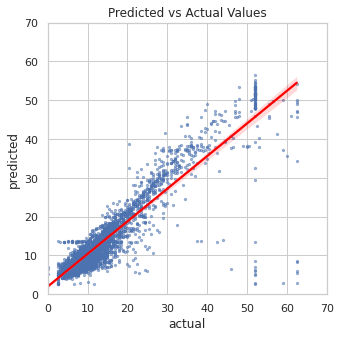

In [65]:
# Create a scatterplot to visualize `predicted` over `actual`

sns.set(style="whitegrid")
p=plt.figure()
p.set_figwidth(5)
p.set_figheight(5)
sns.regplot(x=results['actual'], y=results['predicted'],
           scatter_kws={'alpha':0.5, 's':5},
           line_kws={'color':'red'})

plt.ylim(0,70)
plt.xlim(0,70)
plt.title("Predicted vs Actual Values")
plt.show()

Visualize the distribution of the `residuals` using a histogram

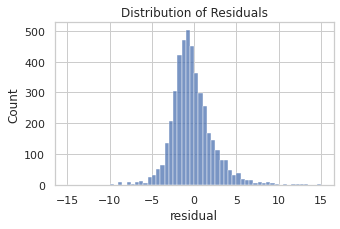

In [66]:
sns.set(style="whitegrid")
p=plt.figure()
p.set_figwidth(5)
p.set_figheight(3)
sns.histplot(data=results['residual'],  bins=np.arange(-15,15.5,0.5)) 

plt.title("Distribution of Residuals")
plt.show()

In [67]:
# Calculate residual mean
results['residual'].mean()

0.022724208110295203

Create a scatterplot of `residuals` over `predicted`.

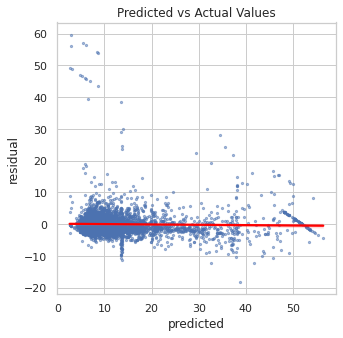

In [70]:
# Create a scatterplot of `residuals` over `predicted`
sns.set(style="whitegrid")
p=plt.figure()
p.set_figwidth(5)
p.set_figheight(5)
sns.regplot(x=results['predicted'], y=results['residual'],
           scatter_kws={'alpha':0.5, 's':5},
           line_kws={'color':'red'})

plt.title("Predicted vs Actual Values")
plt.show()

### Task 9c. Coefficients

Use the `coef_` attribute to get the model's coefficients. The coefficients are output in the order of the features that were used to train the model. Which feature had the greatest effect on trip fare?

In [74]:
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
coefficients

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,-0.012848,0.00068,7.533617,2.484461,0.123625


In [76]:
print(X_train['mean_distance'].std())
print(7.533617 / X_train['mean_distance'].std())

3.2047936057177266
2.3507339089041945


What do these coefficients mean? How should they be interpreted?

Mean distance is the strongest predictor of fare amount, followed by mean duration. Since the features were scaled, a one-unit increase in mean distance corresponds to a $7.53 increase in fare amount, holding other variables constant.

By unscaling the data, we can make a more intuitive prediction: For every 3.2 miles traveled, the average fare increases by $7.53.

### Task 9d. Conclusion

1. What are the key takeaways from this notebook?
2. What results can be presented from this notebook?

1.

* Multiple Linear Regression is a powerful tool to estimate a dependent variable based on multiple continuous independent variables.
* Even though you may have multiple independent variables that are highly correlated, the model can still be used to make effective, accurate predictions. However, if you're using the model to learn about your data, this can pose significant issues.
* EDA is crucial for correct feature selection, handling duplicates, missing values and feature engineering.
* Building a multiple linear regression model often involves experimentation to determine the most important features. Techniques like backward elimination and forward selection can be helpful for this process.

2.

* You can present that the variables with the most predictive power are mean_distance and mean_duration. The outcome of evaluating the model performance against the test data indicates, by looking at the R-Squared value, that 83% of the variation in the dependent variable (fare_amount) is explained by the independent variables.


**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged. 

### 1. Predict on full dataset

In [82]:
X_scaled = scaler.transform(X)
y_preds_full = lr.predict(X_scaled)

### 2. Impute ratecode 2 fare

In [103]:
# Create a new df containing the RatecodeID col.
final_preds = df0[['RatecodeID']].copy()

# Add column containing all predictions
final_preds['y_preds_full'] = y_preds_full

# Impute a prediction of 52 at all rows where RatecodeID == 52
final_preds.loc[final_preds['RatecodeID']==2, 'y_preds_full'] = 52

# Check
final_preds[final_preds['RatecodeID']==2].head()

,RatecodeID,y_preds_full
11,2,52.0
110,2,52.0
161,2,52.0
247,2,52.0
379,2,52.0


### Check performance on full dataset

In [104]:
final_preds = final_preds['y_preds_full']

r2 = r2_score(y, final_preds) 
mae = mean_absolute_error(y, final_preds)
mse = mean_squared_error(y, final_preds)
rmse = np.sqrt(mse)

print('R-squared (R2):', r2)
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)

R-squared (R2): 0.8893227339544223
Mean Absolute Error (MAE): 2.0276882166328973
Mean Squared Error (MSE): 12.297426290781862
Root Mean Squared Error (RMSE): 3.506768639471652


### Save final predictions with `mean_duration` and `mean_distance` columns

In [106]:
# Combine means column with predictions column
nyc_preds_means = df0[['mean_duration','mean_distance']].copy()
nyc_preds_means['predicted_fare'] = final_preds

nyc_preds_means.head()

,mean_duration,mean_distance,predicted_fare
0,23.000000,3.521667,16.773171
1,24.444444,3.108889,15.925566
2,7.257143,0.881429,6.741461
3,30.000000,3.700000,18.647316
4,15.000000,4.435000,16.708504
